# Left-Right symmetric model Lagrangian

In this notebook we study the potential in the reference of [Roitgrund2016](https://www.sciencedirect.com/science/article/pii/S0010465515004476?via%3Dihub) where they consider all vev real, $\beta_{1,2,3}=0$ and $v_L=0$. 

In [1]:
from sympy import symbols, init_printing, Matrix, I, sqrt, conjugate, trace, factor, simplify
from sympy.physics import msigma 
init_printing()

## Scalars

### Triplets

In [2]:
deltaLp, deltaLpp = symbols(r'\delta_L^+, \delta_L^{++}')
deltaRp, deltaRpp = symbols(r'\delta_R^+, \delta_R^{++}')

deltaL0 = symbols(r'\delta_L^0')
deltaR0 = symbols(r'\delta_R^0') ####### These fields are complex in general

In [3]:
sqrt2 = sqrt(2)
DeltaL = Matrix(
    [
        [deltaLp/sqrt2, deltaLpp],
        [deltaL0, -deltaLp/sqrt2]
    ]
)
DeltaR = Matrix(
    [
        [deltaRp/sqrt2, deltaRpp],
        [deltaR0, -deltaRp/sqrt2]
    ]
)

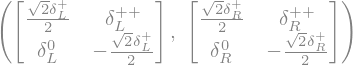

In [4]:
DeltaL, DeltaR

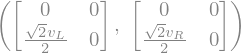

In [5]:
vL, vR, theta = symbols(r'v_L, v_R, \theta', positive=True)
vevL = {deltaL0:vL/sqrt2, deltaLp:0, deltaLpp:0}
vevR = {deltaR0:vR/sqrt2, deltaRp:0, deltaRpp:0}
DeltaL.subs(vevL), DeltaR.subs(vevR)

### Bidoublet

In [6]:
phi1p = symbols(r'\phi_1^+')
phi2p = symbols(r'\phi_2^+')

phi10, phi20 = symbols(r'\phi_1^0, \phi_2^0')

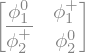

In [7]:
Phi = Matrix(
    [
        [phi10, phi1p],
        [conjugate(phi2p), phi20]
    ]
)
Phi

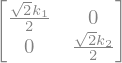

In [8]:
k1, k2 = symbols(r"k_1, k_2", positive=True)
vevPhi = {phi10:k1/sqrt2, phi20:k2/sqrt2, phi1p:0, phi2p:0}
Phi.subs(vevPhi)

## Scalar potential and Higgs mass spectrum

In [9]:
from sympy.physics.quantum import Dagger
from sympy import solve

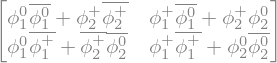

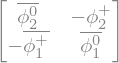

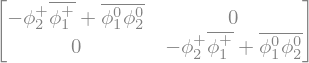

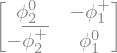

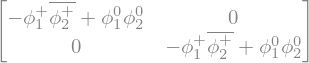

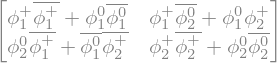

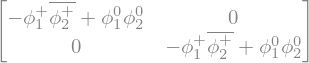

In [10]:
PhiDagger = Dagger(Phi)
#PhiDagger
PhiDaggerPhi = PhiDagger*Phi
display(PhiDaggerPhi)
Phitilde = (msigma(2)*conjugate(Phi)*msigma(2))
#Phitilde
display(Phitilde)
PhitildePhiDagger = Phitilde*PhiDagger
display(PhitildePhiDagger)
PhitildeDagger = Dagger(Phitilde)
#PhitildeDagger
display(PhitildeDagger)
PhitildeDaggerPhi = PhitildeDagger*Phi
display(PhitildeDaggerPhi)
PhiPhiDagger = Phi*PhiDagger
display(PhiPhiDagger)
PhiPhitildeDagger = Phi*PhitildeDagger
display(PhiPhitildeDagger)

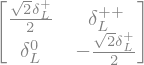

In [11]:
DeltaL

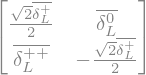

In [12]:
DeltaLDagger = Dagger(DeltaL)
DeltaLDagger

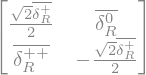

In [13]:
DeltaRDagger = Dagger(DeltaR)
DeltaRDagger

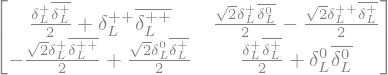

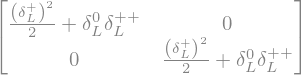

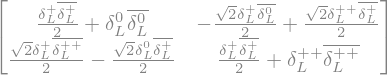

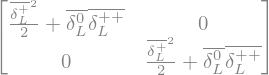

In [14]:
DeltaLDeltaLDagger = DeltaL*DeltaLDagger
display(DeltaLDeltaLDagger)
DeltaLDeltaL = DeltaL*DeltaL
display(DeltaLDeltaL)
DeltaLDaggerDeltaL = DeltaLDagger*DeltaL
display(DeltaLDaggerDeltaL)
DeltaLDaggerDeltaLDagger = DeltaLDagger*DeltaLDagger
display(DeltaLDaggerDeltaLDagger)

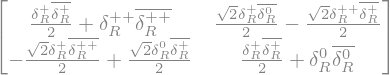

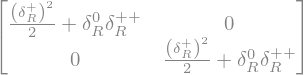

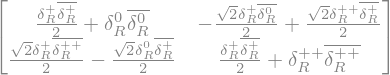

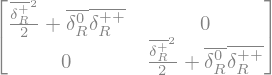

In [15]:
DeltaRDeltaRDagger = DeltaR*DeltaRDagger
display(DeltaRDeltaRDagger)
DeltaRDeltaR = DeltaR*DeltaR
display(DeltaRDeltaR)
DeltaRDaggerDeltaR = DeltaRDagger*DeltaR
display(DeltaRDaggerDeltaR)
DeltaRDaggerDeltaRDagger = DeltaRDagger*DeltaRDagger
display(DeltaRDaggerDeltaRDagger)

### Higgs potential

In [16]:
mu12, mu22, mu32 = symbols(r'\mu_1^2, \mu_2^2, \mu_3^2', real=True)
lamb1, lamb2, lamb3, lamb4 = symbols(r'\lambda_1, \lambda_2, \lambda_3, \lambda_4', real=True)
rho1, rho2, rho3, rho4 = symbols(r'\rho_1, \rho_2, \rho_3, \rho_4', real=True)
alpha1, alpha2, alpha3 = symbols(r'\alpha_1, \alpha_2, \alpha_3', real=True)
# beta1, beta2, beta3 = symbols(r'beta_1, beta_2, beta_3', real=True)

In [140]:
VLRPhi = (
    # Vphi
    -mu12*trace(PhiDaggerPhi)
    - mu22*(trace(Phitilde*PhiDagger) + trace(PhitildeDagger*Phi))
    #
    + lamb1*(trace(PhiPhiDagger))**2
    + lamb2*(trace(PhitildePhiDagger)**2 + trace(PhitildeDaggerPhi)**2)
    + lamb3*trace(PhitildePhiDagger)*trace(PhitildeDaggerPhi)
    + lamb4*trace(PhiDaggerPhi)*(trace(PhitildePhiDagger) + trace(PhitildeDaggerPhi))
    # Vtriplet
    -mu32*(trace(DeltaLDeltaLDagger) + trace(DeltaRDeltaRDagger))
    + rho1*(trace(DeltaLDeltaLDagger)**2 + trace(DeltaRDeltaRDagger)**2)
    + rho2*(trace(DeltaLDeltaL)*trace(DeltaLDaggerDeltaLDagger) + trace(DeltaRDeltaR)*trace(DeltaRDaggerDeltaRDagger))
    + rho3*trace(DeltaLDeltaLDagger)*trace(DeltaRDeltaRDagger)
    + rho4*(trace(DeltaLDeltaL)*trace(DeltaRDaggerDeltaRDagger) + trace(DeltaLDaggerDeltaLDagger)*trace(DeltaRDeltaR))
    # Vdoubletriplet
    + alpha1*trace(PhiDaggerPhi)*(trace(DeltaLDeltaLDagger) + trace(DeltaRDeltaRDagger))
    + alpha2*(
        trace(PhitildeDaggerPhi)*trace(DeltaRDeltaRDagger) + trace(PhitildePhiDagger)*trace(DeltaLDeltaLDagger) + 
        trace(PhitildePhiDagger)*trace(DeltaRDeltaRDagger) + trace(PhitildeDaggerPhi)*trace(DeltaLDeltaLDagger) 
    )
    + alpha3*(
        trace(Phi*Phitilde*DeltaL*DeltaLDagger) + trace(PhiDagger*Phi*DeltaR*DeltaRDagger) #+
        #conjugate(trace(Phi*Phitilde*DeltaL*DeltaLDagger) + trace(PhiDagger*Phi*DeltaR*DeltaRDagger))
    )
    #+ beta1*(trace(Phi*DeltaR*PhiDagger*DeltaLDagger) + trace(PhiDagger*DeltaL*Phi*DeltaRDagger))
    #+ beta2*(trace(Phitilde*DeltaR*PhiDagger*DeltaLDagger) + trace(PhitildeDagger*DeltaL*Phi*DeltaRDagger))
    #+ beta3*(trace(Phi*DeltaR*PhitildeDagger*DeltaLDagger) + trace(PhiDagger*DeltaL*Phitilde*DeltaRDagger))
)
VLRPhi = VLRPhi + conjugate(VLRPhi)
#VLRPhi.subs(vevL).subs(vevR).subs(vevPhi)

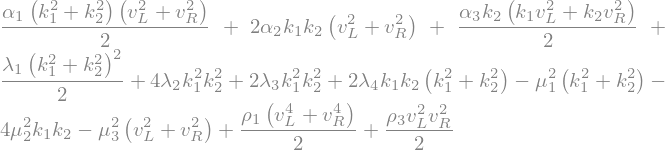

In [142]:
VLRPhi_vev = VLRPhi.subs(vevL).subs(vevR).subs(vevPhi).simplify()#.collect([mu12, mu22, mu32, lamb2, rho1, beta2], factor)#.subs(k1ri)
VLRPhi_vev

# Tadpole conditions

Calculation of the tadpole condition. In this case we only have four conditions because the vev are real.

In [205]:
scalar_vevs = [k1, k2, vR]
tadpoles_relations = {}
for vev in scalar_vevs:
    tadpoles_relations[vev] = VLRPhi_vev.subs(vL, 0).diff(vev).expand().collect(
    [alpha1, alpha2, lamb1, lamb2, lamb3, lamb4], factor)

In [206]:
from sympy import trigsimp

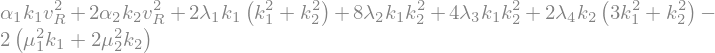

In [207]:
tadpole1_caso1 = tadpoles_relations[k1].trigsimp()
tadpole1_caso1

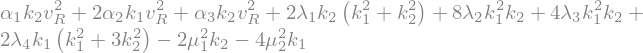

In [208]:
tadpole2_caso1 = tadpoles_relations[k2].trigsimp()
tadpole2_caso1

In [209]:
tadpole12_sol_caso1 = solve([tadpole1_caso1, tadpole2_caso1], [mu12, mu22], dict=True)[0]

In [210]:
for vev in tadpole12_sol_caso1:
    tadpole12_sol_caso1[vev] = tadpole12_sol_caso1[vev].collect([k1, alpha1, alpha2],  trigsimp)

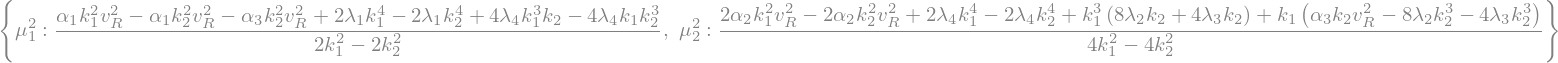

In [211]:
tadpole12_sol_caso1

In [212]:
tadpole3_caso1 = tadpoles_relations[vR].trigsimp()
tadpole3_caso1

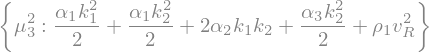

In [214]:
mu32_sol = solve([tadpole3_caso1], [mu32], dict=True)[0]
mu32_sol

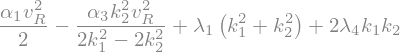

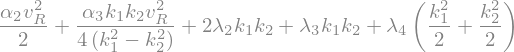

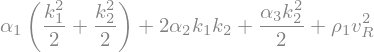

In [215]:
# activate to print the latex code of the tadpole econditions
from sympy import multiline_latex
tadpole_conditions = {}
for tadpole in [tadpole12_sol_caso1, mu32_sol]:
    for param, exp in tadpole.items():
        exp_vL0 = exp.subs(vL, 0).expand().collect([lamb1, lamb4, alpha1, alpha3], simplify)
        display(param, exp_vL0)
        #print(multiline_latex(param, exp_vL0, terms_per_line=3))
        tadpole_conditions[param] = exp_vL0
        print('\n')

In [216]:
b12, lamb14, lamb234, alpha12 = symbols(r'b_{12}, \lambda_{14}, \lambda_{234}, \alpha_{12}', positive=True)
tadpoles_paterns = {
    lamb1 + lamb4:lamb14,
    2*lamb2 + lamb3 + lamb4: lamb234,
    alpha1 + 2*alpha2:alpha12
}

## Mass matrices

Expand neutral fields in terms of real and imaginary parts
$$F = \frac{1}{\sqrt{2}}(F^r + i F^i)$$

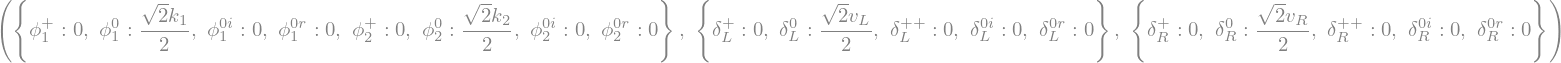

In [217]:
vevPhi, vevL, vevR

In [221]:
phi10r, phi10i = symbols(r'\phi_1^{0r}, \phi_1^{0i}', real=True)
phi20r, phi20i = symbols(r'\phi_2^{0r}, \phi_2^{0i}', real=True)
deltaR0r, deltaR0i = symbols(r'\delta_R^{0r}, \delta_R^{0i}', real=True)
deltaL0r, deltaL0i = symbols(r'\delta_L^{0r}, \delta_L^{0i}', real=True)
complex_scalar_fields = {
    phi10: (k1 + phi10r + I*phi10i)/sqrt2,
    phi20: (k2 + phi20r + I*phi20i)/sqrt2,
    deltaR0: (vR + deltaR0r + I*deltaR0i)/sqrt2,
    deltaL0: (0 + deltaL0r + I*deltaL0i)/sqrt2
}

In [222]:
VLRPhi_ri = VLRPhi.subs(complex_scalar_fields)

# Scalar mass matrices

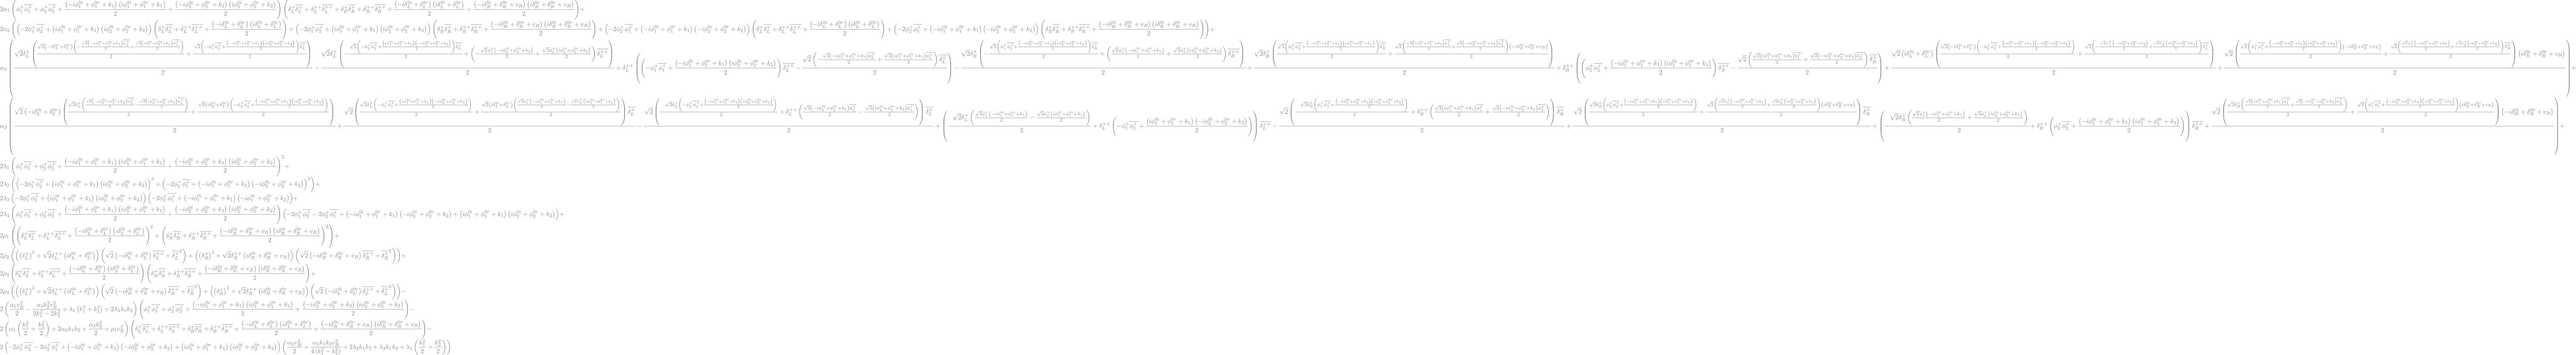

In [223]:
VLRPhi_ri_tadpole_caso1 = VLRPhi_ri.subs(tadpole_conditions)
VLRPhi_ri_tadpole_caso1

In [224]:
vevPhi[phi10r] = 0#vevPhi[phi10]
vevPhi[phi10i] = 0
vevPhi[phi20r] = 0#vevPhi[phi20]
vevPhi[phi20i] = 0

In [225]:
vevL[deltaL0r] = 0#vevL[deltaL0]
vevL[deltaL0i] = 0
vevR[deltaR0r] = 0#vevR[deltaR0]
vevR[deltaR0i] = 0

In [226]:
from sympy import derive_by_array

In [227]:
def build_mass_matrix(potential, fields1, fields2):
    """
    Build the mass matrix for a given potential and fields.
    """
    # Initialize the mass matrix
    Matrix_elements = derive_by_array(derive_by_array(potential, fields1), fields2)

    return Matrix_elements.tomatrix()

## Neutral scalars

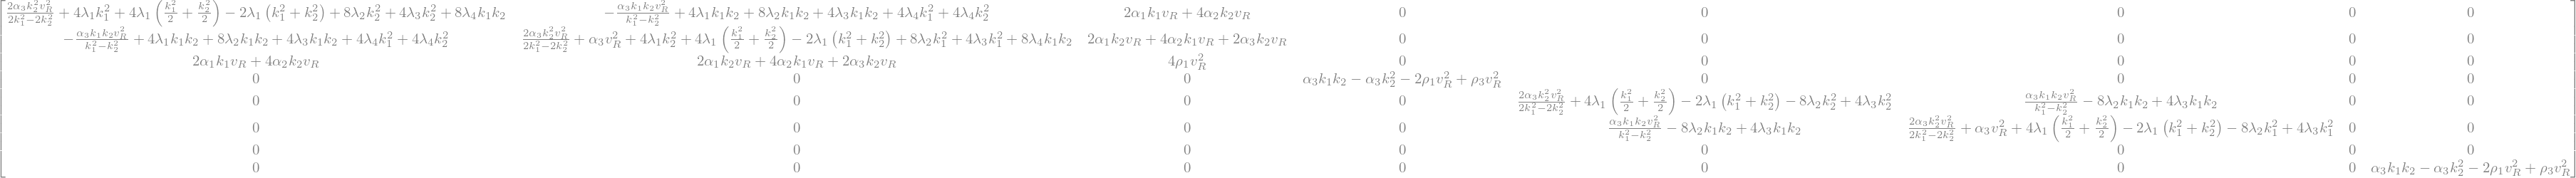

In [228]:
phir_fields = [phi10r, phi20r, deltaR0r, deltaL0r]
phii_fields = [phi10i, phi20i, deltaR0i, deltaL0i]
phiri_fields = phir_fields + phii_fields

MRI_square = (build_mass_matrix(VLRPhi_ri_tadpole_caso1, phiri_fields, phiri_fields)).subs(
    vevPhi
).subs(vevL).subs(vevR)
MRI_square

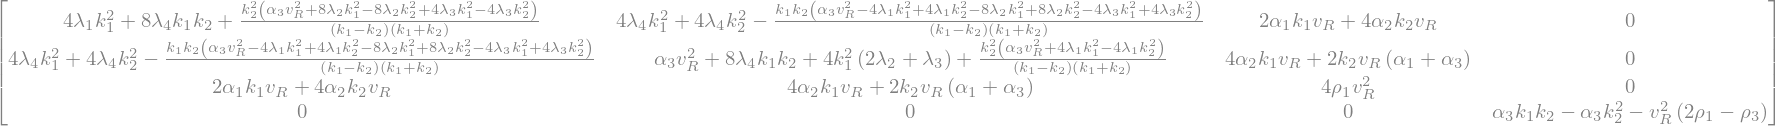

In [229]:
Mrr = MRI_square[0:4, 0:4].applyfunc(lambda x: x.expand().collect([k1, k2], factor))
Mrr

In [231]:
Mrr.rank()

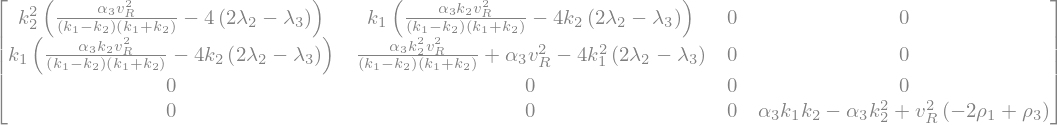

In [232]:
Mii = MRI_square[4:8, 4:8].applyfunc(
    lambda x: x.expand().trigsimp().collect([k1, k2], lambda x:x.collect([vL, vR],factor))
)
Mii

In [233]:
Mii.rank()

In [171]:
#Mii_vR = Mii.tomatrix().applyfunc(lambda x: large_term_propto_(x, vR).factor())
#Mii_vR

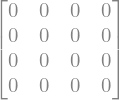

In [234]:
Mri = MRI_square[0:4, 4:8]
Mri

## Singly charges scalars

In [235]:
from sympy import Dummy

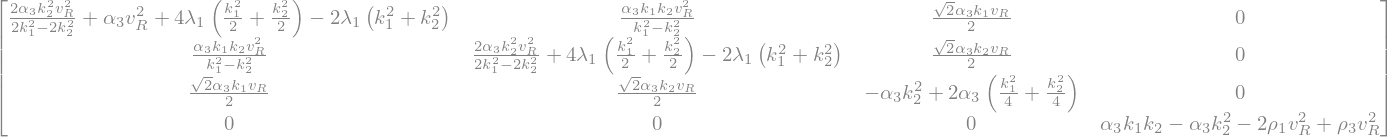

In [236]:
phip_fields = [phi1p, phi2p, deltaRp, deltaLp]

dummyconjugate1p = Dummy(r'\phi_1^{+,d}')
dummyconjugate2p = Dummy(r'\phi_2^{+,d}')
dummyconjugateRp = Dummy(r'\delta_R^{+,d}')
dummyconjugateLp = Dummy(r'\delta_L^{+,d}')

dummychangep = {
    conjugate(phi1p):dummyconjugate1p,
    conjugate(phi2p):dummyconjugate2p,
    conjugate(deltaRp):dummyconjugateRp,
    conjugate(deltaLp):dummyconjugateLp
}
phim_fields = [dummyconjugate1p, dummyconjugate2p, dummyconjugateRp, dummyconjugateLp] #list(dummychangep.values())
Mp_square = (derive_by_array(derive_by_array(VLRPhi_ri_tadpole_caso1.subs(dummychangep), phim_fields), phip_fields)).subs(
    {value:key for key, value in dummychangep.items()}
).subs(
    vevPhi
).subs(vevL).subs(vevR)
Mp_square

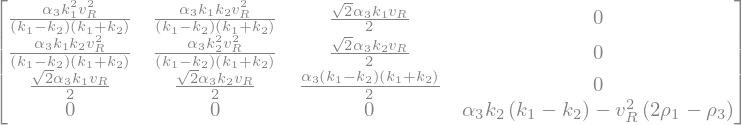

In [237]:
Mp_square.applyfunc(lambda x:x.collect([lamb1, lamb4, alpha1, alpha3], factor))

In [238]:
Mp_square.rank()

## Doubly charged scalars

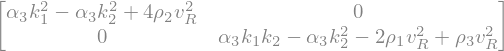

In [288]:
phipp_fields = [deltaRpp, deltaLpp]
dummyconjugateRpp = Dummy('deltaRpp')
dummyconjugateLpp = Dummy('deltaLpp')
dummychangepp = {
    conjugate(deltaRpp):dummyconjugateRpp,
    conjugate(deltaLpp):dummyconjugateLpp
}
phippc_fields = list(dummychangepp.values())#[deltaRmm, deltaLmm]
display(phippc_fields)
Mpp_square = (
    build_mass_matrix(VLRPhi_ri_tadpole_caso1.subs(dummychangepp), fields1=phippc_fields, fields2=phipp_fields)
).subs({value:key for key, value in dummychangepp.items()}).subs(
    vevPhi
).subs(vevL).subs(vevR)
Mpp_square#.applyfunc(factor)

# Diagonalization of mass matrices

The following two functions allows us calculate the mass matrices

## Doubly charged scalars

In [289]:
Ppp, Dpp = Mpp_square.diagonalize()

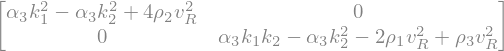

In [290]:
Dpp

In [437]:
from sympy import sin, cos

th = symbols(r'\theta', real=True)
k = symbols('k', positive=True)
k12_changes = {
    k1:k*sin(th),
    k2:k*cos(th)
}

In [291]:
mH1pp = symbols('m_{H_1^{++}}', positive=True)
mH2pp = symbols('m_{H_2^{++}}', positive=True)

In [292]:
from sympy import Eq

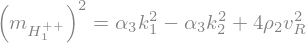

In [293]:
eq1 = Eq(mH1pp**2, Dpp[0,0])
eq1

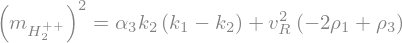

In [294]:
eq2 = Eq(mH2pp**2, Dpp[1,1].collect([vR], factor))
eq2

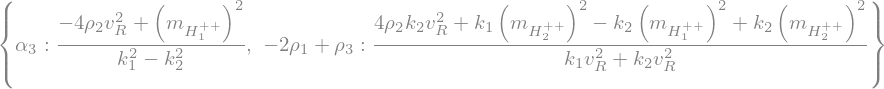

In [297]:
alpha3_rho13_sol = solve([eq1, eq2], [alpha3, rho3 - 2*rho1], dict=True)[0] # beta1*k1**2 + 2*beta2*k1**2
alpha3_rho13_sol

In [298]:
from sympy import multiline_latex

In [299]:
print(multiline_latex(eq1.lhs, eq1.rhs, terms_per_line=3))

\begin{align*}
\left(m_{H_1^{++}}\right)^{2} = & \alpha_{3} k_{1}^{2} - \alpha_{3} k_{2}^{2} + 4 \rho_{2} v_{R}^{2} 
\end{align*}


$$
\begin{align*}
\left(m_{H_1^{++}}\right)^{2} = & \alpha_{3} k_{1}^{2} - \alpha_{3} k_{2}^{2} + 4 \rho_{2} v_{R}^{2} 
\end{align*}
$$

## Mass singly charged scalars

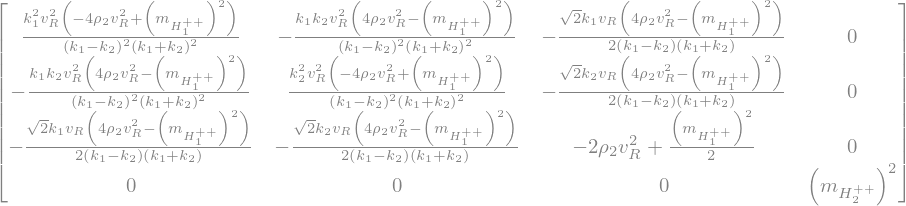

In [303]:
Mp_square = Mp_square.applyfunc(lambda x:x.collect(vR, factor)).subs(alpha3_rho13_sol).simplify()
Mp_square

In [304]:
Mp_square.applyfunc(factor).rank()

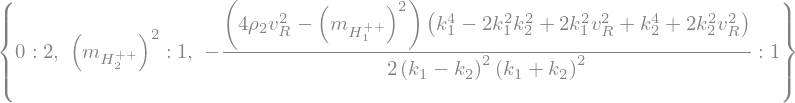

In [305]:
Mp_eigenvals_dict = Mp_square.applyfunc(factor).tomatrix().eigenvals()
Mp_eigenvals_dict

In [306]:
Pp, Dp = Mp_square.applyfunc(factor).tomatrix().diagonalize()

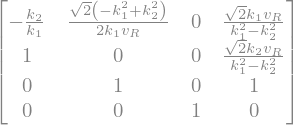

In [308]:
Pp

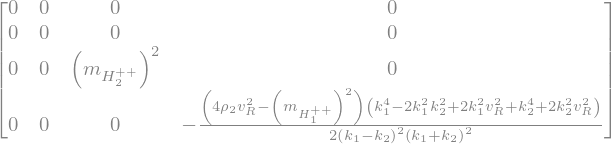

In [309]:
Dp = Dp.applyfunc(factor)
Dp

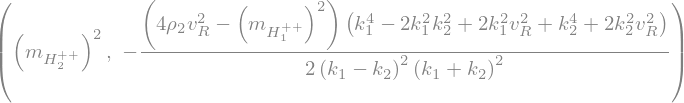

In [310]:
mH1p_exp, mH2p_exp = Dp[2,2], Dp[3,3]
mH1p_exp, mH2p_exp

In [311]:
mH1p, mH2p = symbols('m_{H_1^+}, m_{H_2^+}', positive=True)

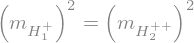

In [312]:
eq1p = Eq(mH1p**2, mH1p_exp.factor())
eq1p

In [313]:
print(multiline_latex(eq1p.lhs, eq1p.rhs))

\begin{align*}
\left(m_{H_1^+}\right)^{2} = & \left(m_{H_2^{++}}\right)^{2} 
\end{align*}


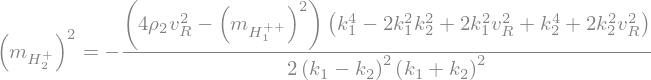

In [314]:
eq2p = Eq(mH2p**2, mH2p_exp.factor())
eq2p

In [315]:
print(multiline_latex(eq2p.lhs, eq2p.rhs))

\begin{align*}
\left(m_{H_2^+}\right)^{2} = &- \frac{\left(4 \rho_{2} v_{R}^{2} - \left(m_{H_1^{++}}\right)^{2}\right) \left(k_{1}^{4} - 2 k_{1}^{2} k_{2}^{2} + 2 k_{1}^{2} v_{R}^{2} + k_{2}^{4} + 2 k_{2}^{2} v_{R}^{2}\right)}{2 \left(k_{1} - k_{2}\right)^{2} \left(k_{1} + k_{2}\right)^{2}} 
\end{align*}


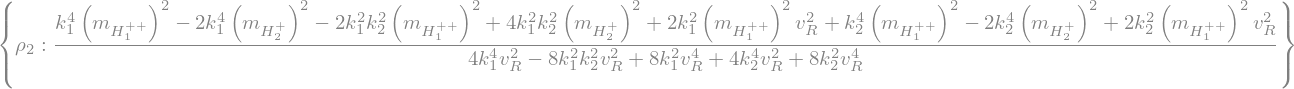

In [316]:
rho2_sol = solve([eq2p], [rho2], dict=True)[0]
rho2_sol

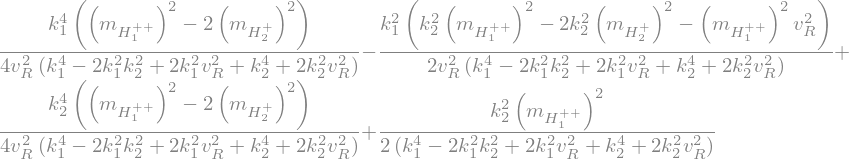

In [319]:
rho2_sol[rho2].expand().collect([k1, k2], factor)

In [372]:
alpha3_rho13_sol[rho3 - 2*rho1] = alpha3_rho13_sol[rho3 - 2*rho1].subs(rho2_sol).expand().collect([k1, k2], factor)

In [374]:
alpha3_rho13_sol[alpha3] = alpha3_rho13_sol[alpha3].subs(rho2_sol).expand().collect([k1, k2], factor)

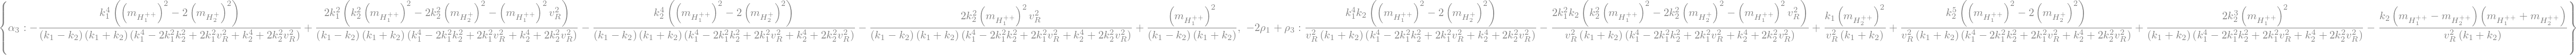

In [375]:
alpha3_rho13_sol

## Mass neutral scalars

## Cp odd

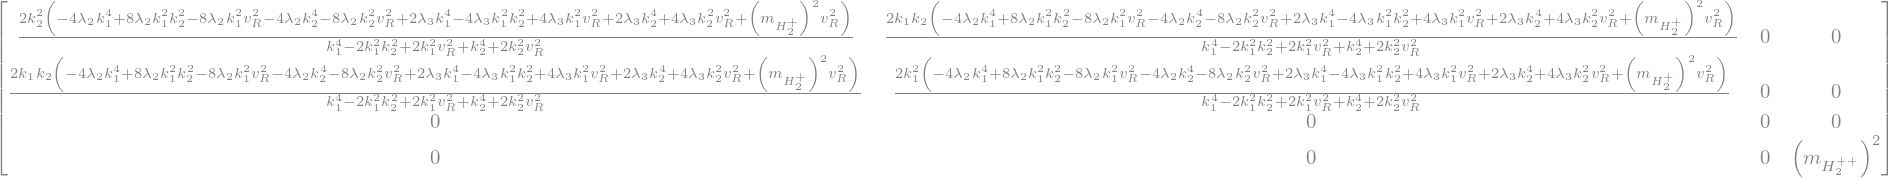

In [377]:

Mii_simplify = Mii.applyfunc(lambda x:x.collect([k1, k2], factor).collect([vR], factor)).subs(alpha3_rho13_sol).subs(rho2_sol).applyfunc(simplify)
Mii_simplify

In [378]:
Pii, Dii = Mii_simplify.diagonalize()

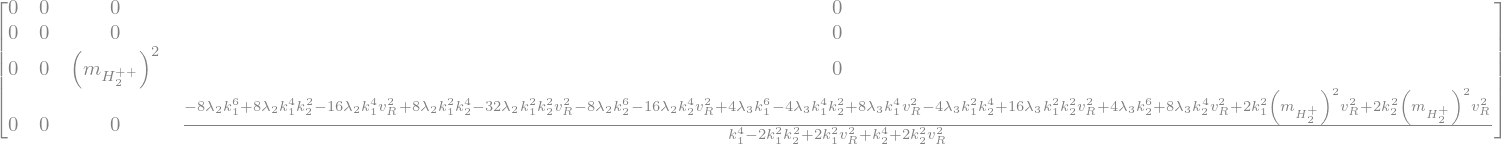

In [379]:
Dii

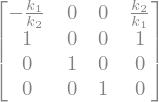

In [380]:
Pii

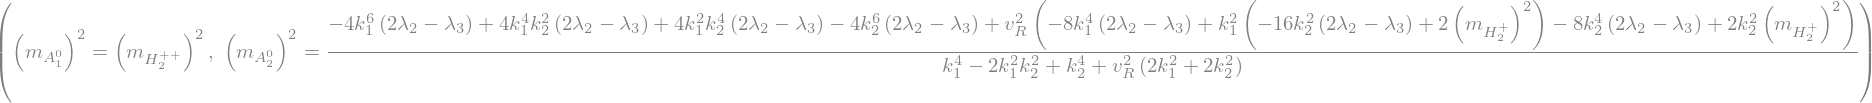

In [381]:
mA1 = symbols('m_{A_1^0}', positive=True)
mA2 = symbols('m_{A_2^0}', positive=True)
eq1ii = Eq(mA1**2, Dii[2,2].collect(vR, factor))
eq2ii = Eq(mA2**2, Dii[3,3].collect(vR, lambda x:x.collect([k1, k2], lambda x:x.collect([k1, k2], factor))))
eq1ii, eq2ii

In [382]:
print(multiline_latex(eq1ii.lhs, eq1ii.rhs))

\begin{align*}
\left(m_{A_1^0}\right)^{2} = & \left(m_{H_2^{++}}\right)^{2} 
\end{align*}


In [383]:
print(multiline_latex(eq2ii.lhs, eq2ii.rhs))


\begin{align*}
\left(m_{A_2^0}\right)^{2} = & \frac{- 4 k_{1}^{6} \left(2 \lambda_{2} - \lambda_{3}\right) + 4 k_{1}^{4} k_{2}^{2} \left(2 \lambda_{2} - \lambda_{3}\right) + 4 k_{1}^{2} k_{2}^{4} \left(2 \lambda_{2} - \lambda_{3}\right) - 4 k_{2}^{6} \left(2 \lambda_{2} - \lambda_{3}\right) + v_{R}^{2} \left(- 8 k_{1}^{4} \left(2 \lambda_{2} - \lambda_{3}\right) + k_{1}^{2} \left(- 16 k_{2}^{2} \left(2 \lambda_{2} - \lambda_{3}\right) + 2 \left(m_{H_2^+}\right)^{2}\right) - 8 k_{2}^{4} \left(2 \lambda_{2} - \lambda_{3}\right) + 2 k_{2}^{2} \left(m_{H_2^+}\right)^{2}\right)}{k_{1}^{4} - 2 k_{1}^{2} k_{2}^{2} + k_{2}^{4} + v_{R}^{2} \left(2 k_{1}^{2} + 2 k_{2}^{2}\right)} 
\end{align*}


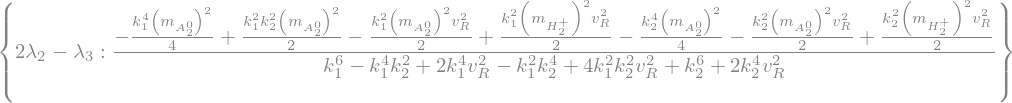

In [384]:
lamb23_sol = solve(eq2ii, 2*lamb2 - lamb3, dict=True)[0]
lamb23_sol

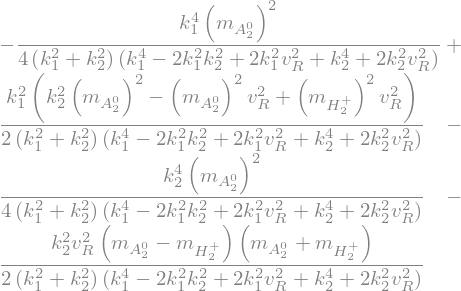

In [385]:
lamb23_sol[2*lamb2 - lamb3].expand().collect([k1, k2], factor)

## CP even

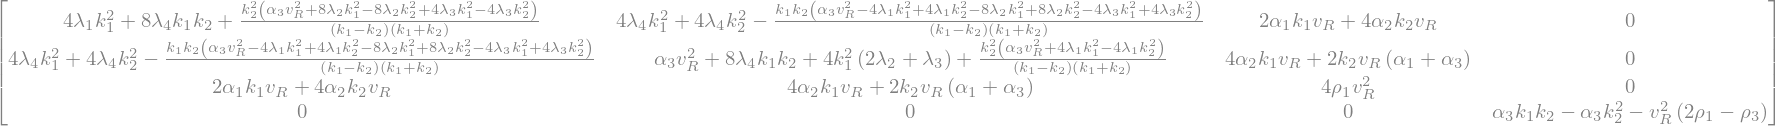

In [471]:
Mrr

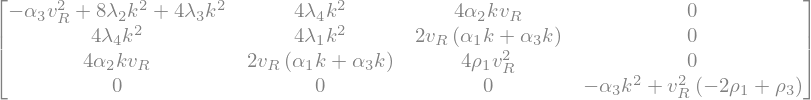

In [473]:
Mrr_th_zero = Mrr.applyfunc(lambda x:x.expand().collect(vR, factor)).subs(k12_changes).subs(th, 0)
Mrr_th_zero

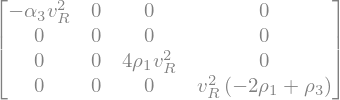

In [475]:
Mrr_th_zero.subs(k,0)

In [ ]:
#Prr, Drr = Mrr_th_zero[0:3,0:3].diagonalize()

In [1]:
#Prr

In [2]:
#Drr

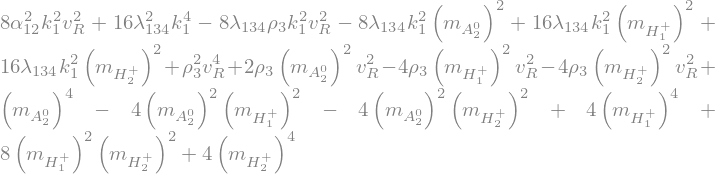

In [129]:
terminsqrt_rr = (Drr[2,2] - Drr[3,3]).simplify().args[1].args[0]
terminsqrt_rr

In [130]:
terminsqrt_approx_rr =terminsqrt_rr.collect(k1, lambda x:x.collect(vR, factor))

In [131]:
Drr[2,2] = Drr[2,2].subs(
        terminsqrt_rr,
        terminsqrt_approx_rr
    ).collect([k1**2])

Drr[3,3] = Drr[3,3].subs(
        terminsqrt_rr,
        terminsqrt_approx_rr
    ).collect([k1**2])

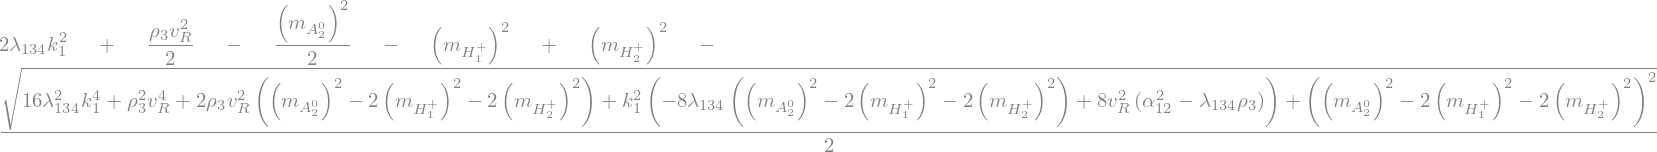

In [132]:
Drr[2,2]

In [133]:
mH1, mH2, mH3, mH4 = symbols('m_{H_1}, m_{H_2}, m_{H_3}, m_{H_4}', positive=True)

In [134]:
eq3rr = Eq(mH3**2, Drr[2,2])
eq4rr = Eq(mH4**2, Drr[3,3])

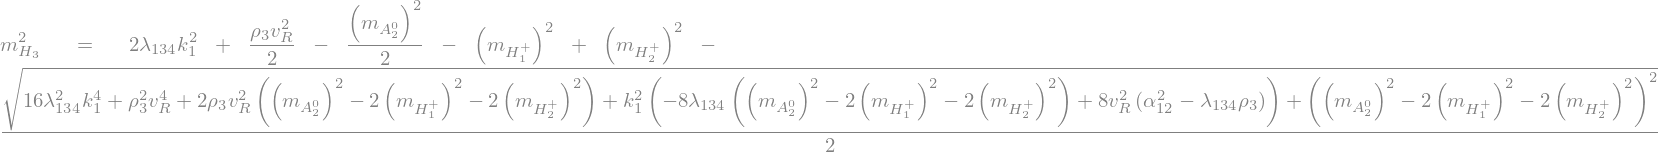

In [135]:
eq3rr

In [136]:
#print(multiline_latex(eq3rr.lhs, eq3rr.rhs, terms_per_line=5))

In [137]:
#print(multiline_latex(eq4rr.lhs, eq4rr.rhs, terms_per_line=5))

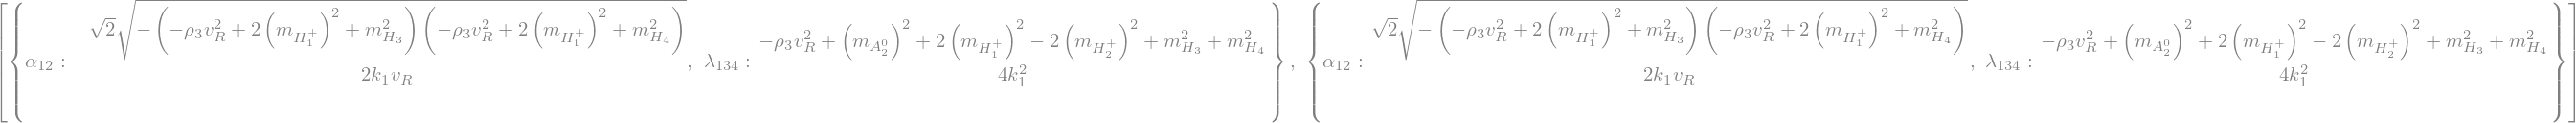

In [138]:
lamb134_alpha12_sol = solve([eq3rr, eq4rr], [alpha12, lamb134], dict=True)
lamb134_alpha12_sol

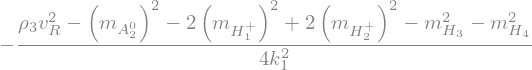

In [604]:
lamb134_alpha12_sol[0][lamb134].factor()

# Yukawa charged lepton sector

In [418]:
from sympy import IndexedBase, Idx

In [419]:
#Indexed?

In [420]:
i,j = symbols('i, j', cls=Idx)
#h = IndexedBase('h')
#ht = IndexedBase(r'\tilde{h}')
hij = symbols('h_{ij}')
htij = symbols(r'\tilde{h}_{ij}')

In [421]:
#ht[i, j]

In [422]:
nueL, numuL, nutauL = symbols(r'{{\nu_{L}}}_e, {{\nu_{L}}}_\mu, {{\nu_{L}}}_\tau')
nueR, numuR, nutauR = symbols(r'{{\nu_{R}}}_e, {{\nu_{R}}}_\mu, {{\nu_{R}}}_\tau')
nuL = IndexedBase(r'{{\nu_{L}}}')
nuR = IndexedBase(r'{{\nu_{R}}}')
eL, muL, tauL = symbols(r'e_L, \mu_L, \tau_L')
eR, muR, tauR = symbols(r'e_R, \mu_R, \tau_R')
lL = IndexedBase('{{l_L}}')
lR = IndexedBase('{{l_R}}')

In [ ]:
nueL, nuL[i]

In [ ]:
LLi = Matrix(
    [
        [nuL[i]],
        [lL[i]]
    ]
)
LRj = Matrix(
    [
        [nuR[j]],
        [lR[j]]
    ]
)
Dagger(LLi), LRj

⎛⎡______________  __________⎤  ⎡{{\nu_{R}}}[j]⎤⎞
⎜⎣{{\nu_{L}}}[i]  {{l_L}}[i]⎦, ⎢              ⎥⎟
⎝                              ⎣  {{l_R}}[j]  ⎦⎠

In [ ]:
Phitilde

⎡\phi⁰₂   -\phi⁻₂⎤
⎢                ⎥
⎣-\phi⁺₁  \phi⁰₁ ⎦

In [ ]:
LY = (Dagger(LLi)*(hij*Phi + htij*Phitilde)*LRj)[0].subs(vevPhi)

In [ ]:
LY

Charged lepton mass

In [ ]:
Ml = LY.args[0].args[0]
Ml

Dirac neutrino mass

In [ ]:
MnuD = LY.args[1].args[0]
MnuD

As we know, the scale of mass of charged leptons is greater than neutrino mass scale. Thus, we assume $k >> k_1$ and $h_{ij} >> \tilde{h}_{ij}$. In this aproximation

In [ ]:
Ml = k*hij
Ml